# Assignment \# I: Linear Regression

## Problem statement

Boston House Prices Dataset is composed of following features:

Detailed descriptions of features in the training dataset are as follows: 



* **CRIM**     :per capita crime rate by town
* **ZN**       :proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**    :proportion of non-retail business acres per town
* **CHAS**     :Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**      :nitric oxides concentration (parts per 10 million)
* **RM**       :average number of rooms per dwelling
* **AGE**      :proportion of owner-occupied units built prior to 1940
* **DIS**      :weighted distances to five Boston employment centres
* **RAD**      :index of accessibility to radial highways
* **TAX**      :full-value property-tax rate per $\$$10,000
* **PTRATIO**  :pupil-teacher ratio by town
* **B**        :1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**    :$\%$ lower status of the population


The target price value we'd like to estimate is as follows: 

* **MEDV** :Median value of owner-occupied homes in $\$$1000's

**Note #1**:
You can use ```linalg.inv```, ```transpose```, ```dot```, ```concatenate```, ```min``` and ```max``` provided by ```Numpy```. Other mehtods (e.g., ```sklearn.linear_model``` or equivalent) should not be used. You will get no credit otherwise. 

**Note #2**: We apply the min-max normalization technique for each feature in the dataset. Please ckeck the provided function (`normalize(self)`). For eaxmple, the nomrlization for the **CRIM** feature is computed as follows:


\begin{equation}
    x[i]^\prime = \frac{x[i] - min(x[:])}{max(x[:]) - min(x[:])}
\end{equation}
where $x[i]$ is the **CRIM** fearue in the $i$th sample in the dataset. $x[i]^\prime$ is a corresponding normalized feature.

**Why is the normalized technique helpful for regression?**

<u>**ANSWER:**</u> In Linear Regression using gradient descent technique, we have to calculate the amount of error using Loss Function. Iteration stops when the loss calculated using the loss function is below certain amount. During this process, we want all features to have equal influences in calculating the loss function.
<p>If each features are not normalized, certain features would make bigger losses than others. Some other features can make smaller losses than others because of their units. As a result, models would be fitted to some features more. We do not want this to happen.</p>
<p> Therefore, we must use normalization techniques to normalize all features so that they have equal differences within each features. For example, all features can be normalized so that they have values between 0 and 1. Then the loss function will generate fair losses for all features so that the model can be fitted to all features fairly.</p>

### 1. Linear regression using gradient descent

1.1 A Linear Regression using Gradient Descent

> **Convergence condition**: Stop the iteration if $||\hat w_t - \hat w_{t+1}||_\infty < \tau$, where $\hat w_t$  is estimated coefficients at time $t$. $t$ is a number of iteration, and $\tau (=10^{-6})$ is a tolerance. Note that the infinity norm of a vector ${\bf{x}}=(x_1,x_2,\dots,x_n)$ is defined as $||{\bf{x}}||_\infty = max(|x_1|,|x_2|,\dots,|x_n|)$.
>
> **Loss function**: Average RSS (i.e., RSS/$N$, where $N$ is a total number of samples).
>
> **Initialization**: All weight values to 0 and a bias (intercept) to 1.

P1.2 Plot an average RSS loss over the number of iterations. (*3 points*) 


P1.3 Predict the target value (`MEDV`) for a given test sample (`test_samples`). Note that 1) you first normalize each feature in the test sample using minimum and maximum values for the same feature, computed from the training dataset ($\texttt{boston_house_prices.csv}$), and then 2) denormalize the prediction in a similar manner. **Why does we apply normalization (with the values computed from the training dataset) and demormalization?** (*7 points*)



<u>**ANSWER:**</u> The model is fitted to features that are ALREADY normalized. Therefore, the model operates with normalized values. Therefore, when we want the model to predict the target value, we must first normalize the test sample with the same maximum and minimum values of training data. 
<p> The model's output is also a normalized value. Since we trained the model to read normalized value and make a normalized output of target value(MEDV), the output of the model is always a normalied one. Therefore, we have to denormalize the target value predicted from the model to get a REAL target value.</p>

### P2. Linear regression without iterations

Implement a linear regression method without iterations (**closed-form solution**) and estimate regression coefficients for features including a bias (intercept) term. (*10 points*)

### P3. Visualize the results

Draw regression lines for individual features using estimated regression coefficients obtained from P1 and P2. (*10points*) 

## Results

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

from LinearRegression import (Dataset,
                      LinearRegressor,
                      LR_with_closed_form,
                      visualize)

### Instantiate the ```Dataset``` class

In [4]:
data_path = 'boston_house_prices.csv'
dataset = Dataset(data_path)

features = dataset.features

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


### Prepare training samples

In [5]:
X, y = dataset.parse_data(features=dataset.features)
print(f"shape of X: {X.shape}, shape of y: {y.shape}")

shape of X: (506, 14), shape of y: (506,)


In [6]:
X[180,:]

array([1.00000000e+00, 6.69440040e-04, 0.00000000e+00, 7.33137830e-02,
       0.00000000e+00, 2.11934156e-01, 8.05518299e-01, 8.28012358e-01,
       1.46532205e-01, 8.69565217e-02, 1.14503817e-02, 5.53191489e-01,
       9.96621110e-01, 1.60871965e-01])

In [7]:
dataset.max

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ,  50.    ])

### Instantiate a linear regression model

In [8]:
model = LinearRegressor(lr=0.1, tau=1e-6, dim=X.shape[1])

### P1.1

In [9]:
ticA = time.perf_counter_ns()
model.LR_with_gradient_descent(X, y)
print(model.weight)
tocA = time.perf_counter_ns()

[ 0.48168649 -0.21330476  0.10325193  0.01231725  0.0597129  -0.19217542
  0.44084054  0.00152926 -0.36118123  0.15646675 -0.14362858 -0.19917884
  0.08186188 -0.42319173]


### P1.2

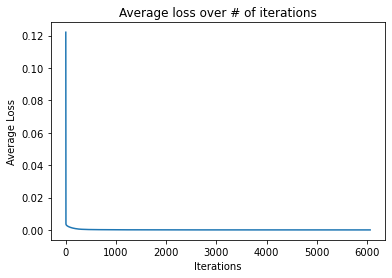

In [10]:
model.plot_loss_history()

### P1.3

In [11]:
test_samples = np.array([0.02, 80, 1.75, 0, 0.385, 6.2, 31.5, 9.1, 1, 241, 18.2, 341.6, 13])

prediction = model.calculate_house_price(test_samples, dataset.min, dataset.max)
print(f"prediction: {prediction}")

prediction: 19.931074197269815


### P2

In [12]:
ticB = time.perf_counter_ns()
weight_closed_form = LR_with_closed_form(X, y)
print(weight_closed_form)
tocB = time.perf_counter_ns()

[ 0.48045039 -0.21355017  0.10315657  0.0124631   0.0597052  -0.1918794
  0.4418597   0.00149367 -0.36059247  0.15642529 -0.14362949 -0.19901831
  0.08206283 -0.42260541]


In [13]:
print(abs(model.weight - weight_closed_form))

[1.23610340e-03 2.45409952e-04 9.53530824e-05 1.45850494e-04
 7.70793919e-06 2.96023392e-04 1.01916287e-03 3.55967266e-05
 5.88766756e-04 4.14606652e-05 9.18059767e-07 1.60528736e-04
 2.00948258e-04 5.86316809e-04]


### P3

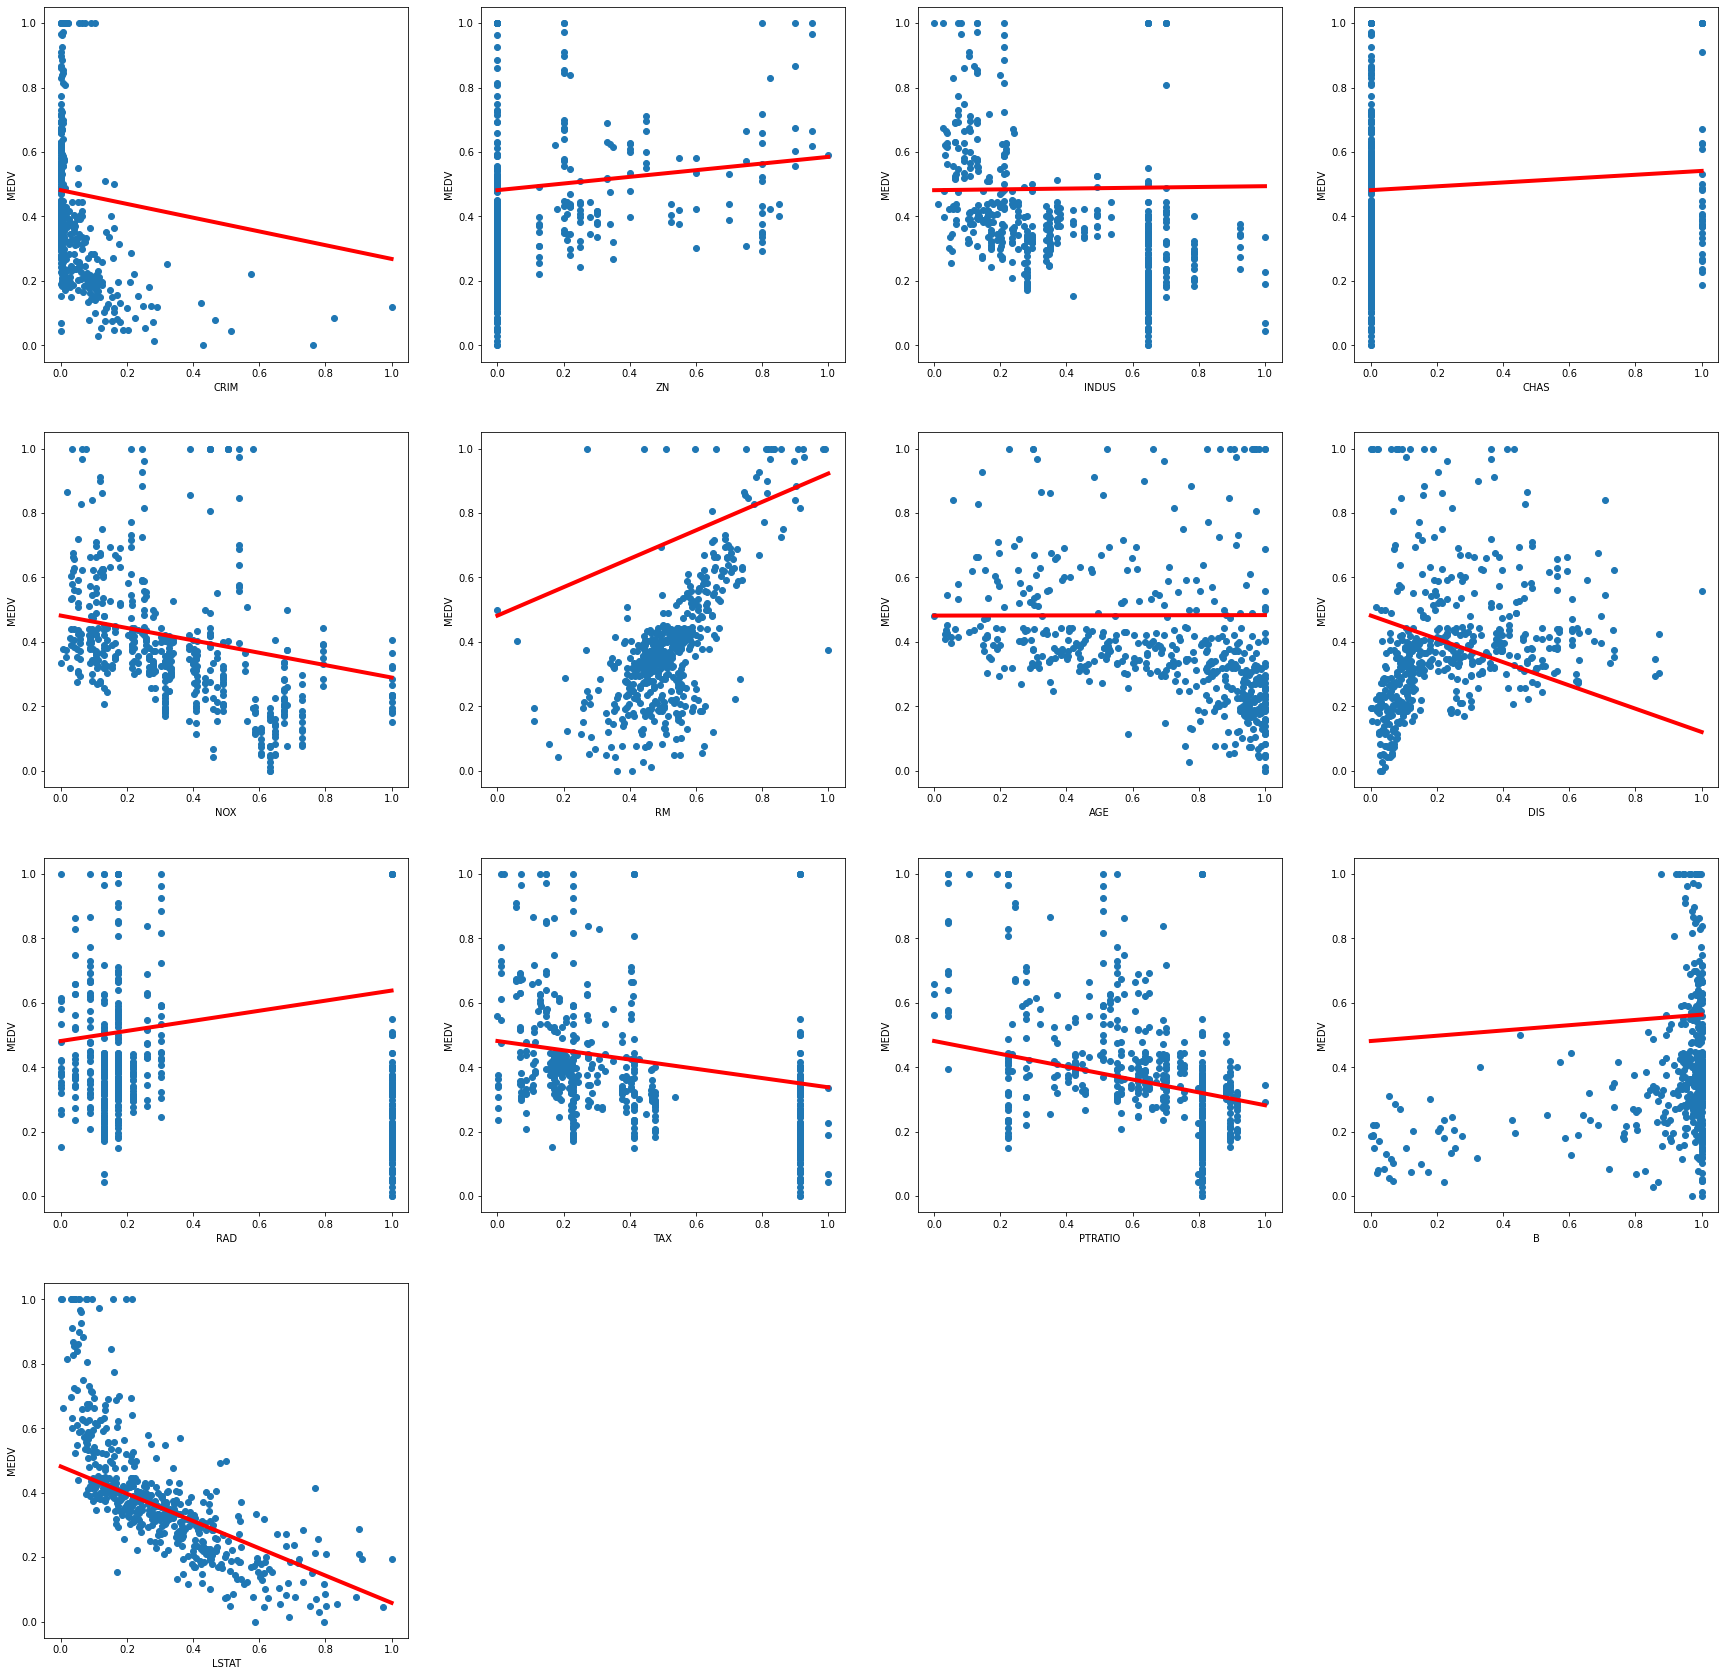

In [14]:
visualize(model.weight, X, y, features)

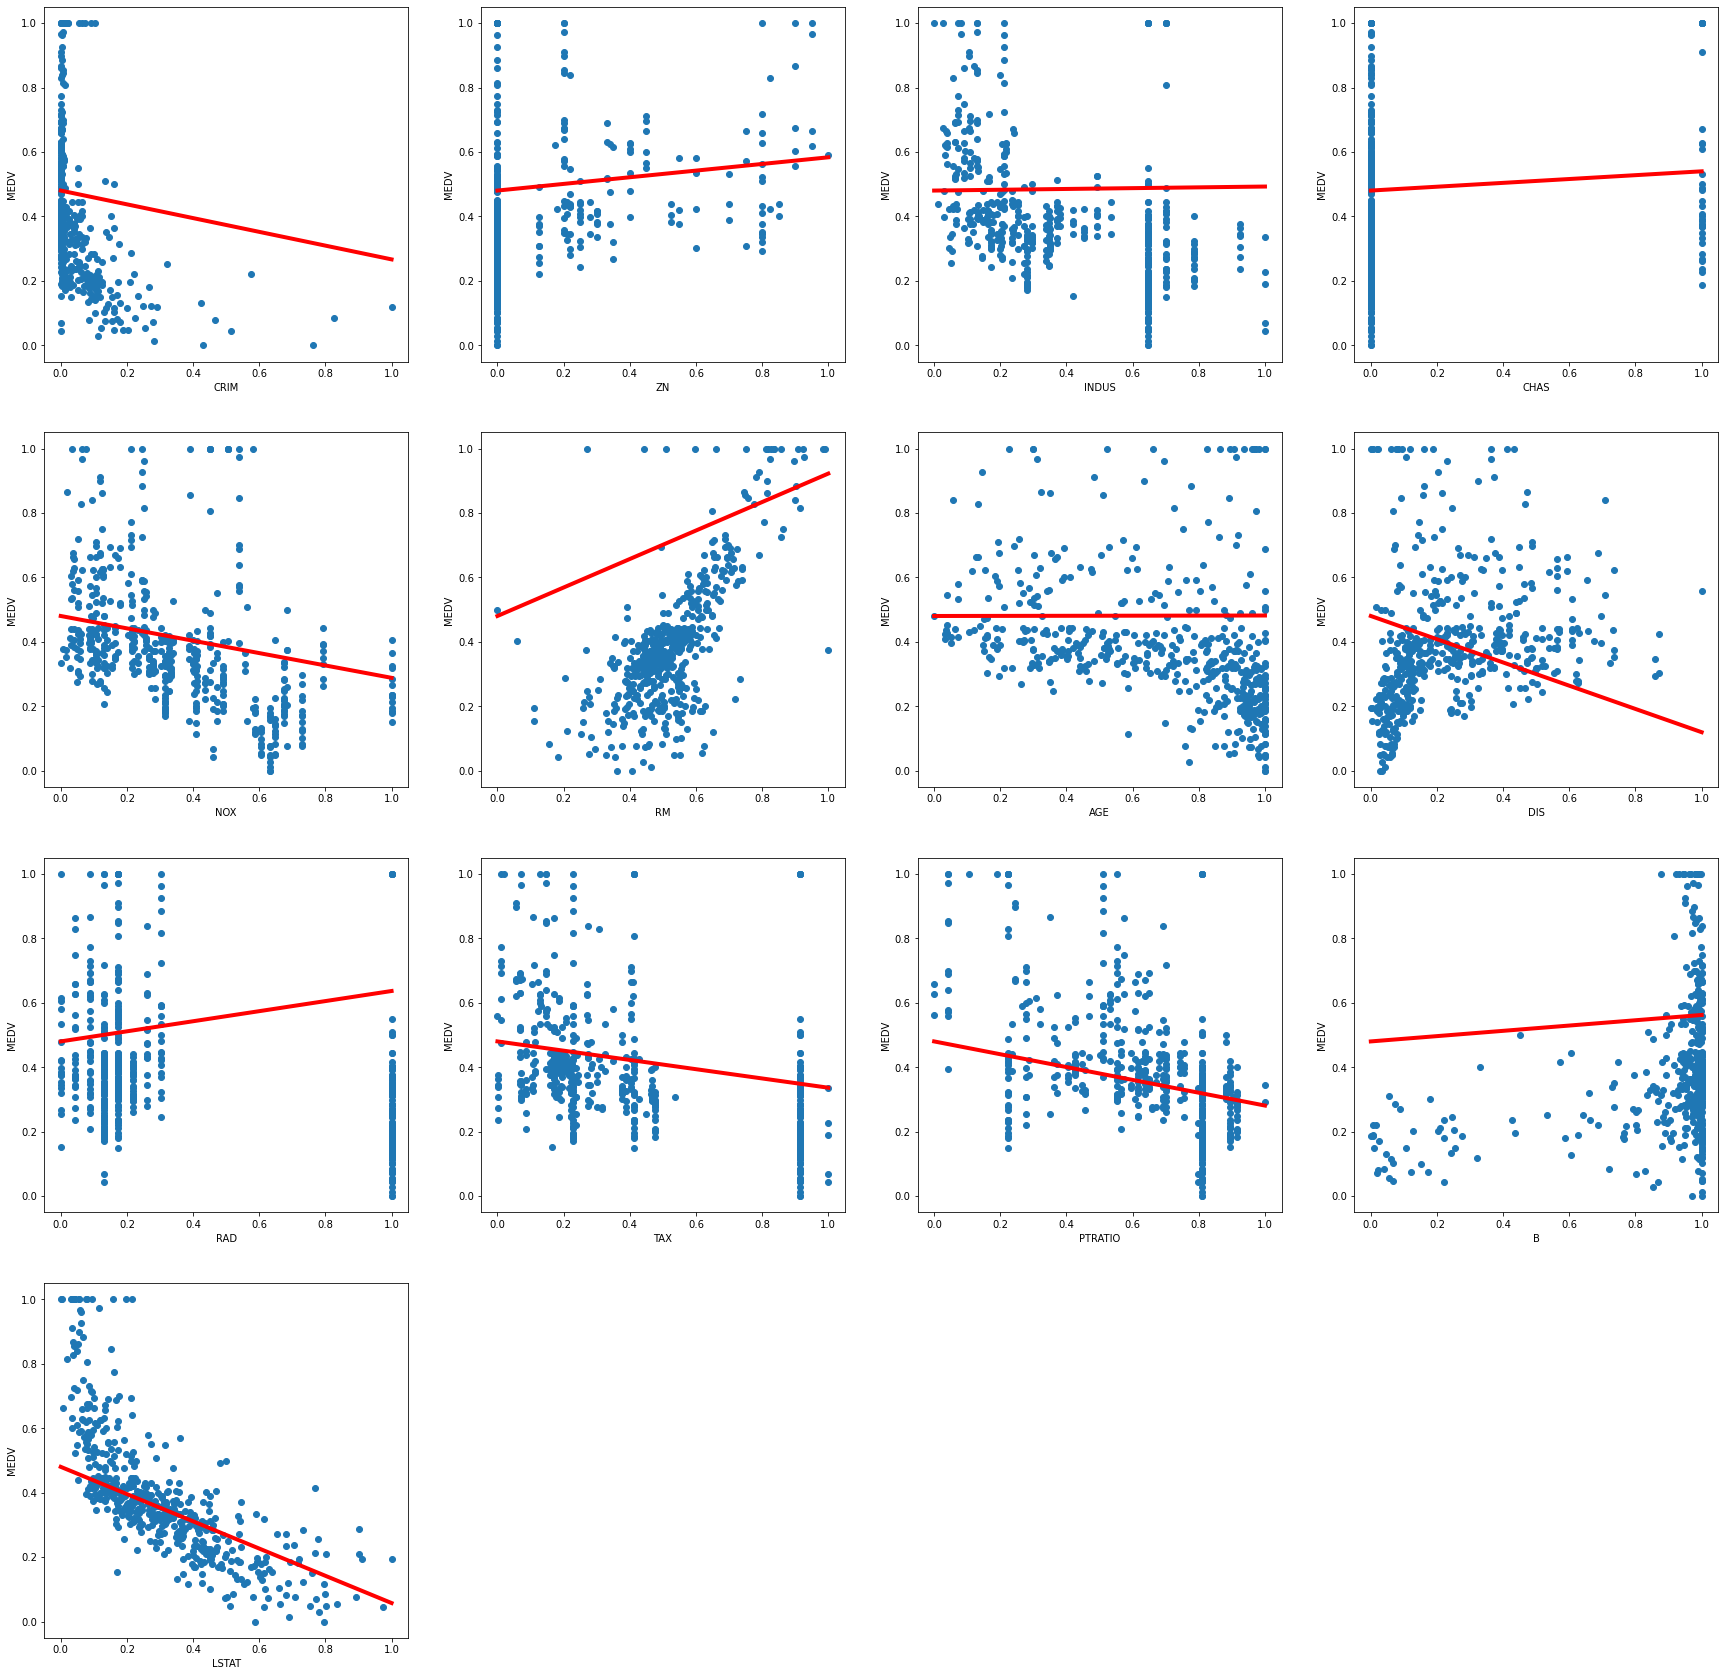

In [15]:
visualize(weight_closed_form, X, y, features)


## Analysis and discussion (20 points)

Your answer must include.....

- Qualitative and quantitative comparisons for the results obtained from gradient descent and closed-form solution
- Qualitative results for
    - the number of features
    - influence of each feature on the prediction
- Effect of the normalization technique
    

For analysis and discussion, you can exploit all functions you've write or make your own functions (or scripts).

An example code to analyze an effect for the number of features is as follows:

### Comparing Gradient Descent and Closed-Form Solution

First, we can compare the time spent for each methods. Codes below shows how much time was spent to make each models using two methods. 

In [16]:
print(f"Time spent for Gradient Descent method: {tocA - ticA} ns")
print(f"Time spent for Closed-Form Soultion method: {tocB - ticB} ns")

Time spent for Gradient Descent method: 359389906 ns
Time spent for Closed-Form Soultion method: 1470700 ns


From above, we can see that Closed-Form solution used mode time than Gradient Descent method. It is because calculating the exact answer of a multidimensional matrix problem needs more calculation.

We can also compare the predictions of two methods.

In [17]:
print(f"Gradient Descent Method's prediction: {prediction}")

min_value = dataset.min
max_value = dataset.max
normalized = (test_samples - min_value[0:13]) / (max_value[0:13] - min_value[0:13])
data = [1];
data.extend(normalized)
price = np.matmul(data, np.transpose(weight_closed_form))
        
price = price * (max_value[13] - min_value[13]) + min_value[13]

print(f"Closed-Form Solution's prediction: {price}")
print(f"Difference: {np.absolute(price - prediction)}")
print(f"Pecentage of Difference compared to min-max value: {np.absolute(price - prediction)/(max_value[13] - min_value[13])*100}%")

Gradient Descent Method's prediction: 19.931074197269815
Closed-Form Solution's prediction: 19.93453298618059
Difference: 0.003458788910773336
Pecentage of Difference compared to min-max value: 0.007686197579496303%


From above, we can see that the two methods give very similar predictions. This shows that using gradient descnet method can replace Closed-Form solution, which often does not give an answer.
</p> To see how accurate the prediction from gradient descent method, I normalized the difference of two predictions. As a result, the difference was 0.0077%. This small percentage means that among the range of target values, it gives a relatively accurate point as an answer. This also shows that the two methods give very similar answers, allowing us to use gradient descent method instead of closed-form solution. </p>

### Influence of Features

The absolute of weights show how much they affect predictions in the model. When the absolute value of a weight is big, that feature makes a big difference in the prediction. On the other hand, a feature that has a smaller weight makes a small difference in prediction. Therefore, we can see which feature takes a big role in this model by looking at absolute values of each features.

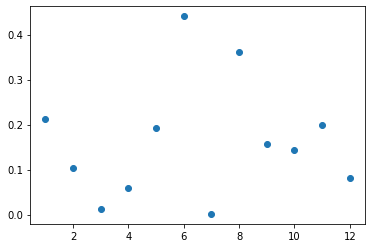

In [18]:
plt.plot(range(1,13), np.absolute(model.weight[1:13]), 'o')

From the above graph, we can see that 6th feature's weight has the largest absolute value among the weights. The feature is RM: average number of rooms per dwelling. This means that the number of rooms make a big difference in the predicted target value compred to other features.
<p> On the other hand, 3rd and 7th features had the smallest absolute values. They are INDUS: proportion of non-retail business acres per town and AGE: proportion of owner-occupies units built prior to 1940. These features had relatively low influences in the model.</p>

To see how 'number of features' affect the model, I can remove some features.

In [19]:
new_dataset = Dataset(data_path)

#select features
sampled = sorted(random.sample(range(0, 12), k=8))
selected = []
for i in sampled:
    selected.append(new_dataset.features[i])
print(f"selected features: {selected} \n")

X_new, y_new = new_dataset.parse_data(features=selected)

#new model with selected features
new_model = LinearRegressor(lr=0.1, tau=1e-6, dim=X_new.shape[1])

ticC = time.perf_counter_ns()
new_model.LR_with_gradient_descent(X_new, y_new)
tocC = time.perf_counter_ns()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
selected features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO'] 



In [20]:
print(new_model.weight)

[ 0.19393788 -0.24453469 -0.02789344 -0.01017143  0.08879327 -0.12939154
  0.78946243 -0.04063547 -0.21306898]


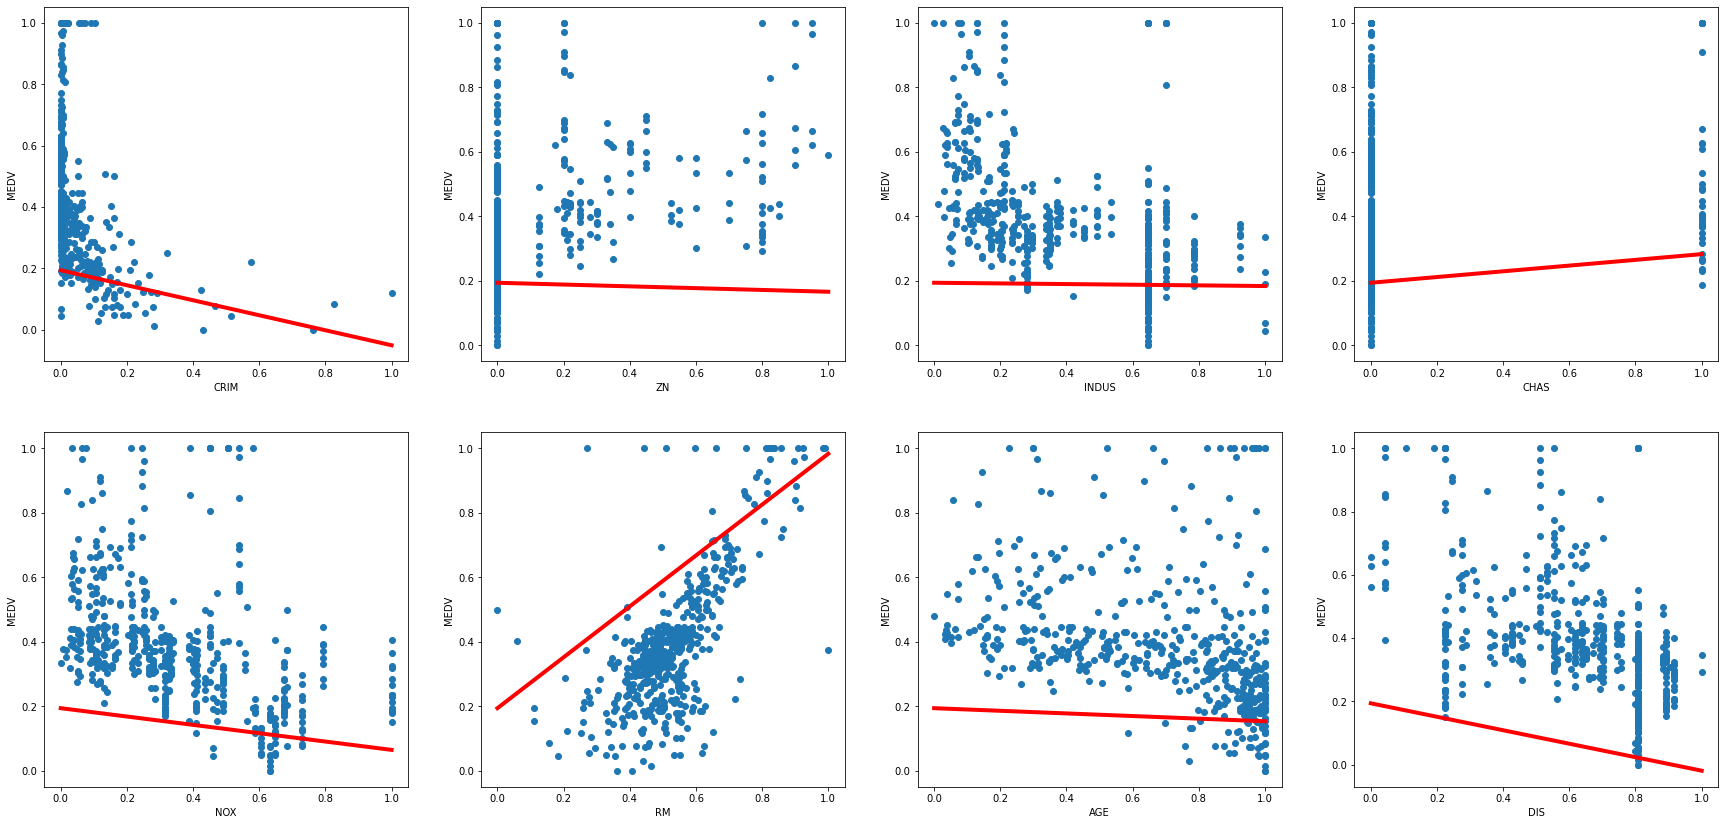

In [21]:
visualize(new_model.weight, X_new, y_new, features)

In [22]:
test_samples = np.array([0.02, 80, 1.75, 0, 0.385, 6.2, 31.5, 9.1, 1, 241, 18.2, 341.6, 13])

new_test_samples = []
for i in sampled:
    new_test_samples.append(test_samples[i])

#make new max, min arrays
new_max = np.array([])
new_min = np.array([])

for i in sampled:
    new_max = np.append(new_max, new_dataset.max[i])
    new_min = np.append(new_min, new_dataset.min[i])

#max and min value of target value
new_max = np.append(new_max, new_dataset.max[13])
new_min = np.append(new_min, new_dataset.min[13])

#predict the value
new_prediction = new_model.calculate_house_price(new_test_samples, new_min, new_max)
print(f"new prediction: {new_prediction}")
print(f"Difference: {np.absolute(prediction - new_prediction)}")
print(f"Pecentage of Difference compared to min-max value: {np.absolute(prediction - new_prediction)/(max_value[13] - min_value[13])*100}%")

new prediction: 24.412756281881798
Difference: 4.4816820846119825
Pecentage of Difference compared to min-max value: 9.95929352135996%


From the above result, we got a new prediction. However, the accuracy of the prediction decreased. Although we cannot say that the predicted value using all 14 features are aboslutely correct, the small difference from closed-form solution implies that it is near the correct answer. Therefore, we can say that reducing the number of features decreases the accuracy.

In [25]:
print(f"Time spent for 13 features: {tocA - ticA} ns")
print(f"Time spent for 8 features: {tocC - ticC} ns")

Time spent for 13 features: 359389906 ns
Time spent for 8 features: 278506143 ns


From the above result, we can see that reducing the number of features decreases calculation time for the model's weight. This is because increasing the number of features increases the complexity of the model and its' weight.

### Effect of Normalization Technique

I made a new parsing method that does not normalize the inputs and outputs.(refer to parse_noNormalize function in project file.) Using the data from this function I calculated the weights.

[1.00002901e+00 4.73022233e-05 4.69711560e-04 2.65168219e-04
 2.70463141e-06 1.52274371e-05 1.90207365e-04 1.80598149e-03
 1.19664056e-04 2.15468598e-04 1.03969774e-02 5.16905300e-04
 1.08071842e-02 2.80585858e-04]


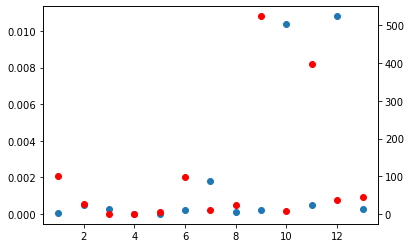

In [26]:
#New data without being normalized
X_noNorm, y_noNorm = dataset.parse_noNormalize(features=dataset.features)
model_noNorm = LinearRegressor(lr=1e-10, tau=1e-6, dim=X_noNorm.shape[1])

#model with non-normalized data
model_noNorm.LR_with_gradient_descent(X_noNorm, y_noNorm)
print(model_noNorm.weight)

fig,ax = plt.subplots()
ax.plot(range(1,14), np.absolute(model_noNorm.weight[1:14]), 'o')
ax2=ax.twinx()
ax2.plot(range(1, 14), dataset.max[1:14]-dataset.min[1:14], 'o', color='r')

From the above result, we can see that features with smaller differences (large units) between datas has a relatively big weights. This is because these small units need much larger weights to make a difference in loss. 
<p> Since we use fixed step sizes during iteration process, features with smaller units continuously make a large loss difference between weights. As a result, they are fitted much more than other features.</p>
<p> This is not what we want. We want all features to be treated equally. Therefore, we need to use normalization techniques so that all features give fair differences and losses when iterating.</p>